## 📍 **Random Forest + Grid Search**

Neste documento, estamos utilizando os dados pré-processados para realizar a classificação do dataframe `'census.csv'` por meio do algoritmo de Random Forest.

### 📍 **Importação de Bibliotecas, Módulos e Variáveis essenciais**


In [1]:
import pickle as pk
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

### 📌 **Random Forest: conjunto sem balanceamento**

In [2]:
with open('../sample_data/census.pkl', 'rb') as f:
    X_census_training_set, y_census_training_set, X_census_test_set, y_census_test_set, df_transformed, one_hot_encoder_census = pk.load(f)

In [3]:
X_census_training_set.shape, y_census_training_set.shape

((27656, 41), (27656,))

In [4]:
X_census_test_set.shape, y_census_test_set.shape

((4881, 41), (4881,))

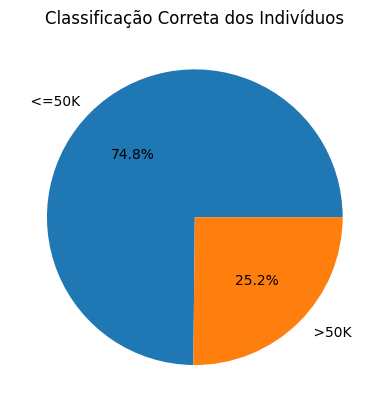

In [5]:
unique, counts = np.unique(y_census_test_set, return_counts=True)
plt.pie(counts, labels = unique, autopct='%1.1f%%')
plt.title('Classificação Correta dos Indivíduos')
plt.show()

In [6]:
from sklearn.model_selection import GridSearchCV

rf_gs = RandomForestClassifier(random_state=0)

param_grid = {'n_estimators': [250], 
              "max_features": ['sqrt', 'log2'], 
              "min_samples_split": [2, 3, 10], 
              'max_depth' : [4,5], 
              'criterion' :['gini', 'entropy']
              }

grid_search = GridSearchCV(rf_gs, param_grid, n_jobs=1, cv=5, scoring='accuracy')
grid_search.fit(X_census_training_set, y_census_training_set)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [250]},
             scoring='accuracy')

In [7]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_split': 3,
 'n_estimators': 250}

In [8]:
cvrf_clf = grid_search.best_estimator_
predictor_gs = cvrf_clf.predict(X_census_test_set)
predictor_gs

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

##### ↬ **Estatísticas de Classificação e Matriz de Confusão**

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from yellowbrick.classifier import ConfusionMatrix

In [10]:
accuracy_score(y_census_test_set, predictor_gs)

0.816840811309158

In [11]:
print(classification_report(y_census_test_set, predictor_gs))

              precision    recall  f1-score   support

       <=50K       0.83      0.96      0.89      3653
        >50K       0.76      0.40      0.52      1228

    accuracy                           0.82      4881
   macro avg       0.79      0.68      0.70      4881
weighted avg       0.81      0.82      0.79      4881



0.816840811309158

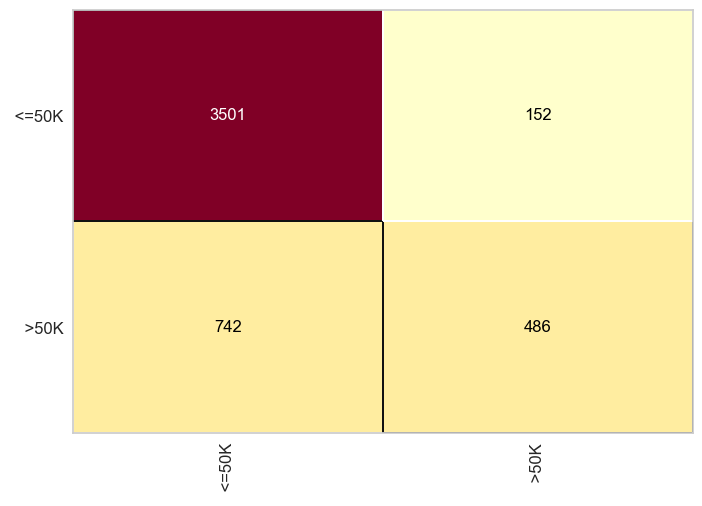

In [12]:
cm = ConfusionMatrix(cvrf_clf)
cm.fit(X_census_training_set, y_census_training_set)
cm.score(X_census_test_set, y_census_test_set)

### 📌 **Random Forest: conjunto com balanceamento do tipo 'Random Over Sampling'**

In [13]:
with open('../sample_data/census_ros.pkl', 'rb') as f_ros:
    X_census_training_set_ros, y_census_training_set_ros, X_census_test_set_ros, y_census_test_set_ros, df_transformed, one_hot_encoder_census = pk.load(f_ros)

In [14]:
X_census_training_set_ros.shape, y_census_training_set_ros.shape

((42090, 41), (42090,))

In [15]:
X_census_test_set_ros.shape, y_census_test_set_ros.shape

((4881, 41), (4881,))

In [16]:
rf_gs_ros = RandomForestClassifier(random_state=0)
grid_search_ros = GridSearchCV(rf_gs_ros, param_grid, n_jobs=1, cv=5, scoring='accuracy')
grid_search_ros.fit(X_census_training_set_ros, y_census_training_set_ros)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [250]},
             scoring='accuracy')

In [17]:
grid_search_ros.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_split': 10,
 'n_estimators': 250}

In [18]:
cvrf_clf_ros = grid_search_ros.best_estimator_
predictor_gs_ros = cvrf_clf_ros.predict(X_census_test_set_ros)
predictor_gs_ros

array([' >50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

##### ↬ **Estatísticas de Classificação e Matriz de Confusão**

In [19]:
accuracy_score(y_census_test_set_ros, predictor_gs_ros)

0.769719319811514

In [20]:
print(classification_report(y_census_test_set_ros, predictor_gs_ros))

              precision    recall  f1-score   support

       <=50K       0.94      0.74      0.83      3653
        >50K       0.53      0.85      0.65      1228

    accuracy                           0.77      4881
   macro avg       0.73      0.80      0.74      4881
weighted avg       0.83      0.77      0.78      4881



0.769719319811514

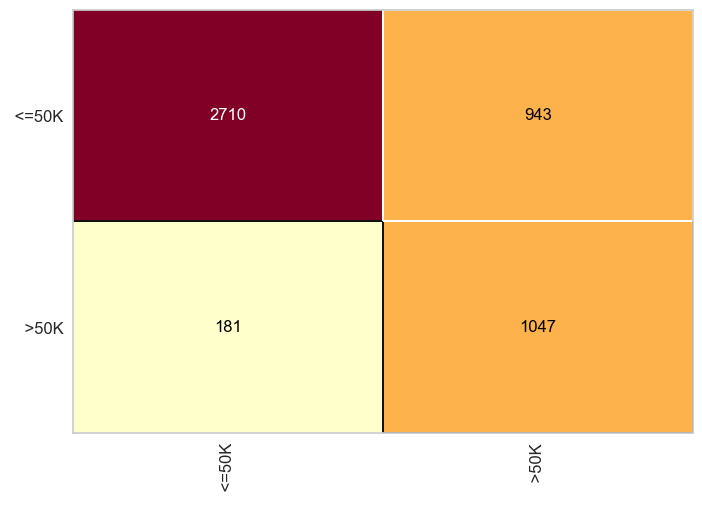

In [21]:
cm = ConfusionMatrix(cvrf_clf_ros)
cm.fit(X_census_training_set_ros, y_census_training_set_ros)
cm.score(X_census_test_set_ros, y_census_test_set_ros)

### 📌 **Random Forest: conjunto com balanceamento do tipo 'SMOTE'**

In [22]:
with open('../sample_data/census_smote.pkl', 'rb') as f_smote:
    X_census_training_set_smote, y_census_training_set_smote, X_census_test_set_smote, y_census_test_set_smote, df_transformed, one_hot_encoder_census = pk.load(f_smote)

In [23]:
X_census_training_set_smote.shape, y_census_training_set_smote.shape

((42090, 41), (42090,))

In [24]:
X_census_test_set_smote.shape, y_census_test_set_smote.shape

((4881, 41), (4881,))

In [25]:
rf_gs_smote = RandomForestClassifier(random_state=0)
grid_search_smote = GridSearchCV(rf_gs_smote, param_grid, n_jobs=1, cv=5, scoring='accuracy')
grid_search_smote.fit(X_census_training_set_smote, y_census_training_set_smote)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [250]},
             scoring='accuracy')

In [26]:
grid_search_smote.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_split': 3,
 'n_estimators': 250}

In [27]:
cvrf_clf_smote = grid_search_smote.best_estimator_
predictor_gs_smote = cvrf_clf_smote.predict(X_census_test_set_smote)
predictor_gs_smote

array([' >50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

##### ↬ **Estatísticas de Classificação e Matriz de Confusão**

In [28]:
accuracy_score(y_census_test_set_smote, predictor_gs_smote)

0.769719319811514

In [29]:
print(classification_report(y_census_test_set_smote, predictor_gs_smote))

              precision    recall  f1-score   support

       <=50K       0.93      0.75      0.83      3653
        >50K       0.53      0.83      0.64      1228

    accuracy                           0.77      4881
   macro avg       0.73      0.79      0.74      4881
weighted avg       0.83      0.77      0.78      4881



0.769719319811514

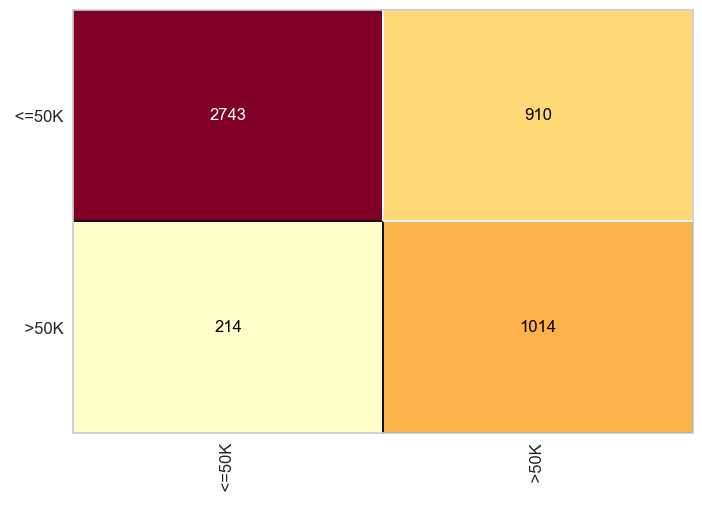

In [30]:
cm = ConfusionMatrix(cvrf_clf_smote)
cm.fit(X_census_training_set_smote, y_census_training_set_smote)
cm.score(X_census_test_set_smote, y_census_test_set_smote)

In [64]:
rf_smote_gs = RandomForestClassifier(random_state=0, criterion='gini', min_samples_leaf=1, max_features=5, min_samples_split=10, n_estimators=150)
rf_smote_gs.fit(X_census_training_set_smote, y_census_training_set_smote)

RandomForestClassifier(max_features=5, min_samples_split=10, n_estimators=150,
                       random_state=0)

In [65]:
predictor_smote_gs = rf_smote_gs.predict(X_census_test_set_smote)
predictor_gs_smote

array([' >50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [66]:
y_census_test_set_smote

array([' >50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [67]:
accuracy_score(y_census_test_set_smote, predictor_smote_gs)

0.8258553575087072

In [68]:
print(classification_report(y_census_test_set_smote, predictor_smote_gs))

              precision    recall  f1-score   support

       <=50K       0.88      0.89      0.88      3653
        >50K       0.66      0.65      0.65      1228

    accuracy                           0.83      4881
   macro avg       0.77      0.77      0.77      4881
weighted avg       0.83      0.83      0.83      4881



0.8258553575087072

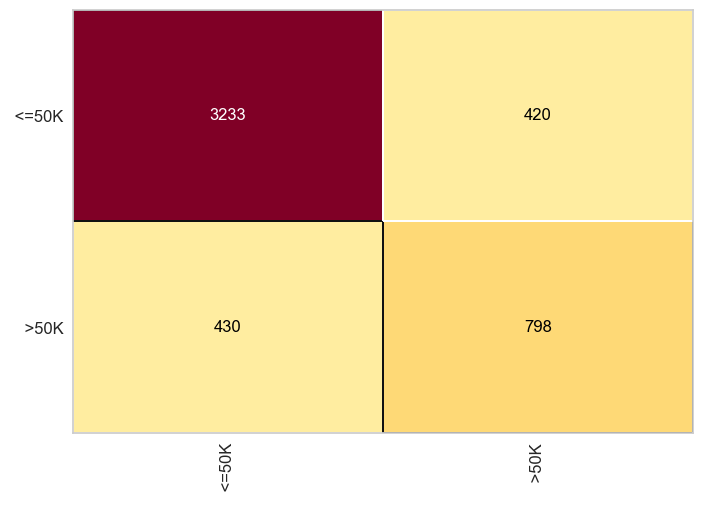

In [69]:
cm = ConfusionMatrix(rf_smote_gs)
cm.fit(X_census_training_set_smote, y_census_training_set_smote)
cm.score(X_census_test_set_smote, y_census_test_set_smote)

### 📌 **Random Forest: conjunto com balanceamento do tipo 'Random Under Sampling'**

In [31]:
with open('../sample_data/census_rus.pkl', 'rb') as f_rus:
    X_census_training_set_rus, y_census_training_set_rus, X_census_test_set_rus, y_census_test_set_rus, df_transformed, one_hot_encoder_census = pk.load(f_rus)

In [32]:
X_census_training_set_rus.shape, y_census_training_set_rus.shape

((13222, 41), (13222,))

In [33]:
X_census_test_set_rus.shape, y_census_test_set_rus.shape

((4881, 41), (4881,))

In [34]:
rf_gs_rus = RandomForestClassifier(random_state=0)
grid_search_rus = GridSearchCV(rf_gs_rus, param_grid, n_jobs=1, cv=5, scoring='accuracy')
grid_search_rus.fit(X_census_training_set_rus, y_census_training_set_rus)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [250]},
             scoring='accuracy')

In [35]:
grid_search_rus.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_split': 3,
 'n_estimators': 250}

In [36]:
cvrf_clf_rus = grid_search_rus.best_estimator_
predictor_gs_rus = cvrf_clf_rus.predict(X_census_test_set_rus)
predictor_gs_rus

array([' >50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

##### ↬ **Estatísticas de Classificação e Matriz de Confusão**

In [37]:
accuracy_score(y_census_test_set_rus, predictor_gs_rus)

0.7680803114115959

In [38]:
print(classification_report(y_census_test_set_rus, predictor_gs_rus))

              precision    recall  f1-score   support

       <=50K       0.94      0.74      0.83      3653
        >50K       0.52      0.85      0.65      1228

    accuracy                           0.77      4881
   macro avg       0.73      0.80      0.74      4881
weighted avg       0.83      0.77      0.78      4881



0.7680803114115959

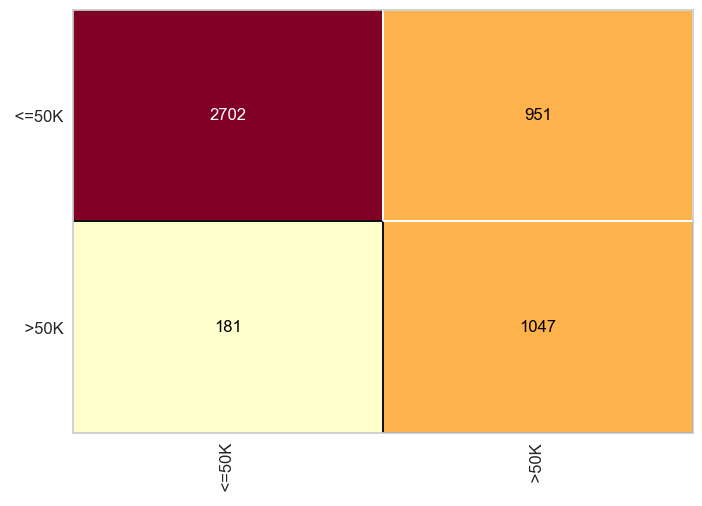

In [39]:
cm = ConfusionMatrix(cvrf_clf_rus)
cm.fit(X_census_training_set_rus, y_census_training_set_rus)
cm.score(X_census_test_set_rus, y_census_test_set_rus)

### 📌 **Random Forest: conjunto com balanceamento do tipo 'NearMiss'**

In [40]:
with open('../sample_data/census_nearmiss.pkl', 'rb') as f_nearmiss:
    X_census_training_set_nearmiss, y_census_training_set_nearmiss, X_census_test_set_nearmiss, y_census_test_set_nearmiss, df_transformed, one_hot_encoder_census = pk.load(f_nearmiss)

In [41]:
X_census_training_set_nearmiss.shape, y_census_training_set_nearmiss.shape

((13222, 41), (13222,))

In [42]:
X_census_test_set_nearmiss.shape, y_census_test_set_nearmiss.shape

((4881, 41), (4881,))

In [43]:
rf_gs_nearmiss = RandomForestClassifier(random_state=0)
grid_search_nearmiss = GridSearchCV(rf_gs_nearmiss, param_grid, n_jobs=1, cv=5, scoring='accuracy')
grid_search_nearmiss.fit(X_census_training_set_nearmiss, y_census_training_set_nearmiss)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [250]},
             scoring='accuracy')

In [44]:
grid_search_nearmiss.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_split': 10,
 'n_estimators': 250}

In [45]:
cvrf_clf_nearmiss = grid_search_nearmiss.best_estimator_
predictor_gs_nearmiss = cvrf_clf_nearmiss.predict(X_census_test_set_nearmiss)
predictor_gs_nearmiss

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype=object)

##### ↬ **Estatísticas de Classificação e Matriz de Confusão**

In [46]:
accuracy_score(y_census_test_set_nearmiss, predictor_gs_nearmiss)

0.7068223724646588

In [47]:
print(classification_report(y_census_test_set_nearmiss, predictor_gs_nearmiss))

              precision    recall  f1-score   support

       <=50K       0.87      0.71      0.78      3653
        >50K       0.45      0.69      0.54      1228

    accuracy                           0.71      4881
   macro avg       0.66      0.70      0.66      4881
weighted avg       0.77      0.71      0.72      4881



0.7068223724646588

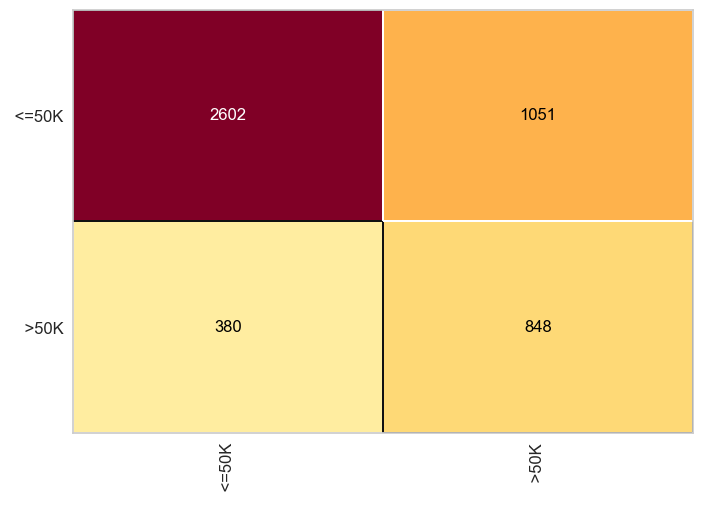

In [48]:
cm = ConfusionMatrix(cvrf_clf_nearmiss)
cm.fit(X_census_training_set_nearmiss, y_census_training_set_nearmiss)
cm.score(X_census_test_set_nearmiss, y_census_test_set_nearmiss)

### ↬ **Entrega Final (Tuning + CV)** 

In [49]:
X_credit_smote = np.concatenate((X_census_training_set_smote, X_census_test_set_smote), axis = 0)
y_credit_smote = np.concatenate((y_census_training_set_smote, y_census_test_set_smote), axis = 0)
X_credit_smote.shape, y_credit_smote.shape

((46971, 41), (46971,))

In [53]:
parameters = {'criterion': ['gini', 'entropy'],
              'n_estimators': [10, 40, 100, 150],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [54]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters)
grid_search.fit(X_credit_smote, y_credit_smote)
best_params = grid_search.best_params_
win = grid_search.best_score_

In [55]:
best_params, win

({'criterion': 'gini',
  'min_samples_leaf': 1,
  'min_samples_split': 10,
  'n_estimators': 150},
 0.8664300982260483)

In [70]:
from sklearn.model_selection import cross_val_score, KFold

In [71]:
results_rf = []

for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)

    rf_cv =  RandomForestClassifier(random_state=0, criterion='gini', min_samples_leaf=1, max_features=5, min_samples_split=10, n_estimators=150)
    scores = cross_val_score(rf_cv, X_credit_smote, y_credit_smote, cv=kfold)

    results_rf.append(scores.mean())

In [72]:
results_rf

[0.8703456315195528,
 0.8713249437858444,
 0.8698344993992253,
 0.8706435445647805,
 0.8704944634189029,
 0.8697918601159603,
 0.869557971706078,
 0.8710906701767829,
 0.8707288457900857,
 0.8699409820476337,
 0.870750018149679,
 0.869664155258653,
 0.8704094023766157,
 0.8700261609155522,
 0.8710054323960487,
 0.8717718654688694,
 0.8698984605900002,
 0.8697070256614255,
 0.869685558737754,
 0.8701326345004506,
 0.87040935252731,
 0.8708352513986582,
 0.8698770117933489,
 0.8694939878565279,
 0.8702390627677984,
 0.8701966410087758,
 0.870792480694497,
 0.8699197960927751,
 0.8698771613412652,
 0.8708776504989055]

In [73]:
X_census_sm = np.concatenate((X_census_test_set_smote, X_census_training_set_smote), axis= 0)
y_census_sm = np.concatenate((y_census_test_set_smote, y_census_training_set_smote), axis=0)

In [74]:
classifier_random_forest = RandomForestClassifier(random_state=0, criterion='gini', min_samples_leaf=1, max_features=5, min_samples_split=10, n_estimators=150)
classifier_random_forest.fit(X_census_sm, y_census_sm)

RandomForestClassifier(max_features=5, min_samples_split=10, n_estimators=150,
                       random_state=0)

In [75]:
pk.dump(classifier_random_forest, open('random_forest_finished.sav', 'wb'))